# Linear Regression

In [1]:
import pandas as pd

con_belief = pd.read_csv("data/conspiracy_belief_score.csv")

con_belief.shape

(2301, 8)

In [2]:
con_belief.head()

conspiracy_belief_score              education             childhood  \
0                 4.333333  Less than high school              Suburban   
1                 2.466667        Graduate degree              Suburban   
2                 3.666667      University degree  Rural (country side)   
3                 3.933333            High school              Suburban   
4                 1.000000      University degree  Rural (country side)   

   gender   hand  family_size  age  test_time  
0  Female  Right            1   14        125  
1  Female  Right            2   26        141  
2    Male  Right            3   25         58  
3    Male  Right            2   37        105  
4    Male  Right            2   34         87

In [3]:
con_belief.describe()

conspiracy_belief_score  family_size          age    test_time
count              2301.000000  2301.000000  2301.000000  2301.000000
mean                  2.887266     2.519774    27.621034   147.853542
std                   1.033407     1.323426    13.312523   352.173772
min                   0.866667     0.000000    13.000000     3.000000
25%                   2.066667     2.000000    18.000000    82.000000
50%                   2.866667     2.000000    22.000000   107.000000
75%                   3.666667     3.000000    34.000000   141.000000
max                   5.000000    19.000000    75.000000  9881.000000

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(con_belief)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
con_belief = pd.get_dummies(con_belief, drop_first = True)

con_belief.head()

conspiracy_belief_score  family_size  age  test_time  \
0                 4.333333            1   14        125   
1                 2.466667            2   26        141   
2                 3.666667            3   25         58   
3                 3.933333            2   37        105   
4                 1.000000            2   34         87   

   education_High school  education_Less than high school  \
0                      0                                1   
1                      0                                0   
2                      0                                0   
3                      1                                0   
4                      0                                0   

   education_University degree  childhood_Suburban  \
0                            0                   1   
1                            0                   1   
2                            1                   0   
3                            0                   1   
4                            1                   0   

   childhood_Urban (town, city)  gender_Male  gender_Other  hand_Right  
0                             0            0             0           1  
1                             0            0             0           1  
2                             0            1             0           1  
3                             0            1             0           1  
4                             0            1             0           1

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# create our response array (univariate "series")
response_var = con_belief["conspiracy_belief_score"]

# put our predictors in a dataframe
predictor_vars = con_belief.drop(columns = "conspiracy_belief_score")

In [9]:
response_var

0       4.333333
1       2.466667
2       3.666667
3       3.933333
4       1.000000
          ...   
2296    3.066667
2297    1.333333
2298    3.800000
2299    1.666667
2300    3.400000
Name: conspiracy_belief_score, Length: 2301, dtype: float64

In [10]:
predictor_vars

family_size  age  test_time  education_High school  \
0               1   14        125                      0   
1               2   26        141                      0   
2               3   25         58                      0   
3               2   37        105                      1   
4               2   34         87                      0   
...           ...  ...        ...                    ...   
2296            3   32        116                      0   
2297            2   25         68                      0   
2298            2   34        100                      1   
2299            2   19        139                      1   
2300            1   16        175                      0   

      education_Less than high school  education_University degree  \
0                                   1                            0   
1                                   0                            0   
2                                   0                            1   
3                                   0                            0   
4                                   0                            1   
...                               ...                          ...   
2296                                0                            1   
2297                                0                            0   
2298                                0                            0   
2299                                0                            0   
2300                                1                            0   

      childhood_Suburban  childhood_Urban (town, city)  gender_Male  \
0                      1                             0            0   
1                      1                             0            0   
2                      0                             0            1   
3                      1                             0            1   
4                      0                             0            1   
...                  ...                           ...          ...   
2296                   0                             1            1   
2297                   1                             0            0   
2298                   0                             1            0   
2299                   1                             0            1   
2300                   0                             1            0   

      gender_Other  hand_Right  
0                0           1  
1                0           1  
2                0           1  
3                0           1  
4                0           1  
...            ...         ...  
2296             0           1  
2297             0           0  
2298             0           1  
2299             0           1  
2300             0           1  

[2301 rows x 11 columns]

In [11]:
model = LinearRegression()

In [12]:
model.fit(predictor_vars, response_var)

LinearRegression()

In [13]:
model.score(predictor_vars, response_var)

0.040043284303887816

In [14]:
model.intercept_

2.397096757592805

In [15]:
model.coef_

array([ 3.87812859e-02,  7.39820803e-03,  1.05323590e-04,  4.34347163e-01,
        3.32422446e-01,  1.45233709e-01, -5.03516396e-02,  1.10445101e-01,
       -2.09621506e-01,  5.34224823e-03, -2.52485900e-02])

In [16]:
predictor_vars.columns

Index(['family_size', 'age', 'test_time', 'education_High school',
       'education_Less than high school', 'education_University degree',
       'childhood_Suburban', 'childhood_Urban (town, city)', 'gender_Male',
       'gender_Other', 'hand_Right'],
      dtype='object')

In [17]:
df = pd.DataFrame(model.coef_, model.feature_names_in_)
df

0
family_size                      0.038781
age                              0.007398
test_time                        0.000105
education_High school            0.434347
education_Less than high school  0.332422
education_University degree      0.145234
childhood_Suburban              -0.050352
childhood_Urban (town, city)     0.110445
gender_Male                     -0.209622
gender_Other                     0.005342
hand_Right                      -0.025249

In [18]:
pd.DataFrame(
{
    "Variable": predictor_vars.columns.values,
    "Coefficient": model.coef_
})

Variable  Coefficient
0                       family_size     0.038781
1                               age     0.007398
2                         test_time     0.000105
3             education_High school     0.434347
4   education_Less than high school     0.332422
5       education_University degree     0.145234
6                childhood_Suburban    -0.050352
7      childhood_Urban (town, city)     0.110445
8                       gender_Male    -0.209622
9                      gender_Other     0.005342
10                       hand_Right    -0.025249

In [19]:
import statsmodels.api as sm

# intercept not included in model so need to add constant to dataframe
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars

const  family_size  age  test_time  education_High school  \
0       1.0            1   14        125                      0   
1       1.0            2   26        141                      0   
2       1.0            3   25         58                      0   
3       1.0            2   37        105                      1   
4       1.0            2   34         87                      0   
...     ...          ...  ...        ...                    ...   
2296    1.0            3   32        116                      0   
2297    1.0            2   25         68                      0   
2298    1.0            2   34        100                      1   
2299    1.0            2   19        139                      1   
2300    1.0            1   16        175                      0   

      education_Less than high school  education_University degree  \
0                                   1                            0   
1                                   0                            0   
2                                   0                            1   
3                                   0                            0   
4                                   0                            1   
...                               ...                          ...   
2296                                0                            1   
2297                                0                            0   
2298                                0                            0   
2299                                0                            0   
2300                                1                            0   

      childhood_Suburban  childhood_Urban (town, city)  gender_Male  \
0                      1                             0            0   
1                      1                             0            0   
2                      0                             0            1   
3                      1                             0            1   
4                      0                             0            1   
...                  ...                           ...          ...   
2296                   0                             1            1   
2297                   1                             0            0   
2298                   0                             1            0   
2299                   1                             0            1   
2300                   0                             1            0   

      gender_Other  hand_Right  
0                0           1  
1                0           1  
2                0           1  
3                0           1  
4                0           1  
...            ...         ...  
2296             0           1  
2297             0           0  
2298             0           1  
2299             0           1  
2300             0           1  

[2301 rows x 12 columns]

In [20]:
sm_model = sm.OLS(response_var, predictor_vars).fit()

print(sm_model.summary())

                               OLS Regression Results                              
Dep. Variable:     conspiracy_belief_score   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     8.680
Date:                     Thu, 29 Sep 2022   Prob (F-statistic):           3.09e-15
Time:                             14:29:47   Log-Likelihood:                -3293.1
No. Observations:                     2301   AIC:                             6610.
Df Residuals:                         2289   BIC:                             6679.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [21]:
residuals = sm_model.fittedvalues - response_var

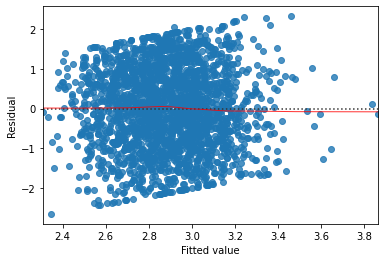

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(x= sm_model.fittedvalues,
             y = residuals,
             lowess = True,
             line_kws = {'color': 'red',
                        'lw': 1,
                        'alpha': 0.8})

plt.xlabel("Fitted value")
plt.ylabel("Residual");

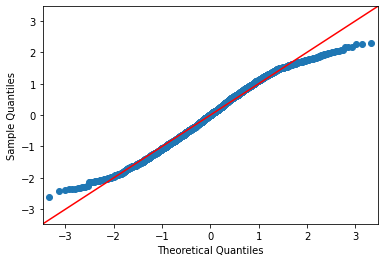

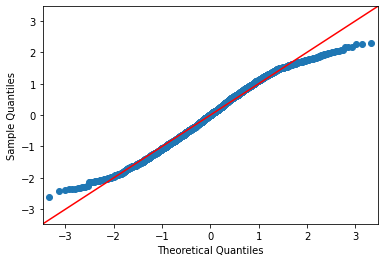

In [23]:
import scipy.stats as stats

sm.qqplot(residuals, dist = stats.t, fit = True, line = '45')

# Logistic Regression

In [24]:
loans = pd.read_csv("data/loans.csv")

In [25]:
pandas_profiling.ProfileReport(loans)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
loans_clean = (
    loans
    .query('loan_status != "Current"')
    .copy()
)

loans_clean.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
5     5000.0  36 months      7.90     A           RENT     36000.0   

          purpose  loan_status  
0     credit_card   Fully Paid  
1             car  Charged Off  
2  small_business   Fully Paid  
3           other   Fully Paid  
5         wedding   Fully Paid

In [27]:
loans.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
4     3000.0  60 months     12.69     B           RENT     80000.0   

          purpose  loan_status  
0     credit_card   Fully Paid  
1             car  Charged Off  
2  small_business   Fully Paid  
3           other   Fully Paid  
4           other      Current

In [28]:
loans_clean.isna().sum()

loan_amnt         5
term              5
int_rate          5
grade             0
home_ownership    5
annual_inc        9
purpose           5
loan_status       5
dtype: int64

In [29]:
loans_clean.dropna(inplace = True)

In [30]:
import numpy as np

loans_clean.loc[:, "paid"] = (
    np.where(loans_clean['loan_status'] == 'Fully Paid', 1, 0)
)

loans_clean.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
5     5000.0  36 months      7.90     A           RENT     36000.0   

          purpose  loan_status  paid  
0     credit_card   Fully Paid     1  
1             car  Charged Off     0  
2  small_business   Fully Paid     1  
3           other   Fully Paid     1  
5         wedding   Fully Paid     1

In [31]:
loans_clean.drop(columns = 'loan_status', inplace = True)

loans_clean.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
5     5000.0  36 months      7.90     A           RENT     36000.0   

          purpose  paid  
0     credit_card     1  
1             car     0  
2  small_business     1  
3           other     1  
5         wedding     1

In [50]:
loans_clean.loc[:, "annual_inc"] = (
    np.log(loans_clean['annual_inc'])
)

loan_amnt  int_rate  annual_inc  paid  term_60 months  grade_B  \
0         5000.0     10.65    2.311129     1               0        1   
1         2500.0     15.27    2.333013     0               1        0   
2         2400.0     15.96    2.242139     1               0        0   
3        10000.0     13.49    2.379884     1               0        0   
5         5000.0      7.90    2.350544     1               0        0   
...          ...       ...         ...   ...             ...      ...   
42531     6500.0      9.64    2.292887     0               0        1   
42532     3500.0     10.28    2.493264     0               0        0   
42533     1000.0      9.64    2.239929     0               0        1   
42534     2525.0      9.33    2.451715     0               0        1   
42536     5000.0      7.75    2.412000     0               0        0   

       grade_C  grade_D  grade_E  grade_F  ...  purpose_home_improvement  \
0            0        0        0        0  ...                         0   
1            1        0        0        0  ...                         0   
2            1        0        0        0  ...                         0   
3            1        0        0        0  ...                         0   
5            0        0        0        0  ...                         0   
...        ...      ...      ...      ...  ...                       ...   
42531        0        0        0        0  ...                         0   
42532        1        0        0        0  ...                         0   
42533        0        0        0        0  ...                         0   
42534        0        0        0        0  ...                         0   
42536        0        0        0        0  ...                         0   

       purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0                  0                       0                0               0   
1                  0                       0                0               0   
2                  0                       0                0               0   
3                  0                       0                0               0   
5                  0                       0                0               0   
...              ...                     ...              ...             ...   
42531              0                       0                0               0   
42532              0                       0                0               0   
42533              0                       0                0               0   
42534              0                       0                0               0   
42536              0                       0                0               0   

       purpose_other  purpose_renewable_energy  purpose_small_business  \
0                  0                         0                       0   
1                  0                         0                       0   
2                  0                         0                       1   
3                  1                         0                       0   
5                  0                         0                       0   
...              ...                       ...                     ...   
42531              1                         0                       0   
42532              1                         0                       0   
42533              1                         0                       0   
42534              1                         0                       0   
42536              1                         0                       0   

       purpose_vacation  purpose_wedding  
0                     0                0  
1                     0                0  
2                     0                0  
3                     0                0  
5                     0                1  
...                 ...              ...  
42531                 0                0  
42532      

In [33]:
loans_clean = pd.get_dummies(loans_clean, drop_first = True)

loans_clean.head()

loan_amnt  int_rate  annual_inc  paid  term_60 months  grade_B  grade_C  \
0     5000.0     10.65   10.085809     1               0        1        0   
1     2500.0     15.27   10.308953     0               1        0        1   
2     2400.0     15.96    9.413444     1               0        0        1   
3    10000.0     13.49   10.803649     1               0        0        1   
5     5000.0      7.90   10.491274     1               0        0        0   

   grade_D  grade_E  grade_F  ...  purpose_home_improvement  purpose_house  \
0        0        0        0  ...                         0              0   
1        0        0        0  ...                         0              0   
2        0        0        0  ...                         0              0   
3        0        0        0  ...                         0              0   
5        0        0        0  ...                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
5                         0                       0                 0   

   purpose_wedding  
0                0  
1                0  
2                0  
3                0  
5                1  

[5 rows x 28 columns]

In [34]:
loans_predictors = loans_clean.drop(columns = 'paid')
loans_response = loans_clean['paid']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = (
    train_test_split(
        loans_predictors,
        loans_response,
        test_size = 0.1, # size of test split = 10%
        random_state = 7 # for replicability in the class
    )
)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(loans_pred_train, loans_resp_train)

model.score(loans_pred_train, loans_resp_train)
# for logistic regression the score is the 'accuracy'

0.7971918045453334

In [38]:
loans_clean.describe()

loan_amnt      int_rate    annual_inc          paid  term_60 months  \
count  41704.000000  41704.000000  41704.000000  41704.000000    41704.000000   
mean   10962.039613     12.107992     10.967611      0.797909        0.243957   
std     7326.938957      3.687395      0.568668      0.401565        0.429472   
min      500.000000      5.420000      7.547502      0.000000        0.000000   
25%     5000.000000      9.620000     10.596635      1.000000        0.000000   
50%     9600.000000     11.990000     10.973966      1.000000        0.000000   
75%    15000.000000     14.650000     11.314475      1.000000        0.000000   
max    35000.000000     24.590000     15.607270      1.000000        1.000000   

            grade_B       grade_C       grade_D       grade_E       grade_F  \
count  41704.000000  41704.000000  41704.000000  41704.000000  41704.000000   
mean       0.290859      0.205040      0.140298      0.078482      0.029973   
std        0.454164      0.403736      0.347300      0.268931      0.170515   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  purpose_home_improvement  purpose_house  purpose_major_purchase  \
count  ...              41704.000000   41704.000000            41704.000000   
mean   ...                  0.075221       0.009975                0.054911   
std    ...                  0.263750       0.099377                0.227809   
min    ...                  0.000000       0.000000                0.000000   
25%    ...                  0.000000       0.000000                0.000000   
50%    ...                  0.000000       0.000000                0.000000   
75%    ...                  0.000000       0.000000                0.000000   
max    ...                  1.000000       1.000000                1.000000   

       purpose_medical  purpose_moving  purpose_other  \
count     41704.000000    41704.000000   41704.000000   
mean          0.017816        0.014987       0.103443   
std           0.132284        0.121500       0.304541   
min           0.000000        0.000000       0.000000   
25%           0.000000        0.000000       0.000000   
50%           0.000000        0.000000       0.000000   
75%           0.000000        0.000000       0.000000   
max           1.000000        1.000000       1.000000   

       purpose_renewable_energy  purpose_small_business  purpose_vacation  \
count              41704.000000            41704.000000      41704.000000   
mean                   0.002518                0.046566          0.009519   
std                    0.050115                0.210711          0.097103   
min                    0.000000                0.000000          0.000000   
25%                    0.000000                0.000000          0.000000   
50%                    0.000000                0.000000          0.000000   
75%                    0.000000                0.000000          0.000000   
max                    1.000000                1.000000          1.000000   

       purpose_wedding  
count     41704.000000  
mean          0.023739  
std           0.152236  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  

[8 rows x 28 columns]

Since the mean of 'paid' is around 0.8 and our model accuracy is around 0.8, then it shows the model is actually not very good at predicting at whether a loan is being paid or not, since a model which predicted everyone to pay their loan would be just as correct, i.e. 80% accuracy.

In [39]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = "accuracy", cv = 10
)
scores

array([0.79675013, 0.79754928, 0.79754928, 0.79669598, 0.79802824,
       0.79802824, 0.79509726, 0.79589662, 0.79616307, 0.79722888])

In [40]:
np.mean(scores)

0.7968986984094131

In [41]:
model.score(loans_pred_test, loans_resp_test)

0.8002877007911772

In [42]:
pred_test = model.predict_proba(loans_pred_test)
pred_test
# outputs array of two values for each prediction (first value is prob is FALSE and second value is prob is TRUE)

array([[0.07391078, 0.92608922],
       [0.15132636, 0.84867364],
       [0.26681119, 0.73318881],
       ...,
       [0.14017955, 0.85982045],
       [0.07847714, 0.92152286],
       [0.08421639, 0.91578361]])

In [43]:
# subset the probability of "True" columns
pred_test = pred_test[:, 1]
pred_test

array([0.92608922, 0.84867364, 0.73318881, ..., 0.85982045, 0.92152286,
       0.91578361])

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = loans_resp_test,
              y_score = pred_test)

0.6871435693636435

# Decision Trees (Random Forests)

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

In [46]:
model.fit(loans_pred_train, loans_resp_train)

RandomForestClassifier()

In [47]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = "accuracy", cv = 10
)

np.mean(scores)

0.7915168060898466

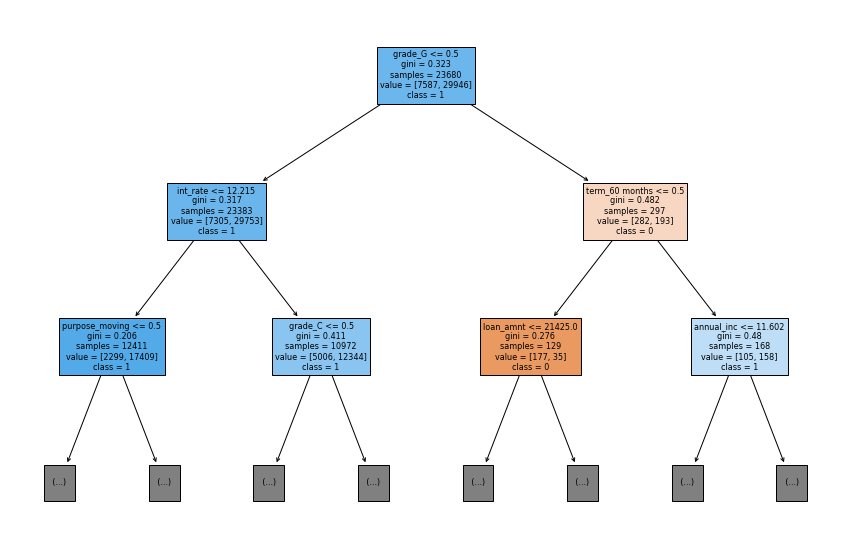

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# create a list with names of predictors, and an array with target categories for plotting
loans_pred_names = list(loans_pred_test)
loans_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
plot_tree(model.estimators_[0], # Pull out one tree from the forest
          max_depth = 2, # will freeze if we try plot all of it!
          feature_names = loans_pred_names,
          class_names = loans_resp_names, 
          filled=True);

In [49]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(loans_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: annual_inc                               Importance: 0.31
Variable: int_rate                                 Importance: 0.28
Variable: loan_amnt                                Importance: 0.24
Variable: term_60 months                           Importance: 0.02
Variable: home_ownership_RENT                      Importance: 0.02
Variable: grade_B                                  Importance: 0.01
Variable: grade_C                                  Importance: 0.01
Variable: grade_D                                  Importance: 0.01
Variable: grade_E                                  Importance: 0.01
Variable: grade_F                                  Importance: 0.01
Variable: grade_G                                  Importance: 0.01
Variable: home_ownership_OWN                       Importance: 0.01
Variable: purpose_credit_card                      Importance: 0.01
Variable: purpose_debt_consolidation               Importance: 0.01
Variable: purpose_home_improvement              